In [1]:
%pip install --upgrade pip
%pip install numpy
%pip install matplotlib
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [2]:
"""Kyrylo Boiko Lab 3"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline


data = fetch_california_housing()
X, y = data.data, data.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
"""Kyrylo Boiko Lab 3"""

def train_and_evaluate_model(model, degree, X_train, X_test, y_train, y_test, alpha_range):
    poly = PolynomialFeatures(degree=degree)
    mse_list = []
    mae_list = []
    
    for alpha in alpha_range:
        pipeline = make_pipeline(poly, StandardScaler(), model(alpha=alpha, max_iter=90000))
        pipeline.fit(X_train, y_train)
        
        y_pred = pipeline.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        mse_list.append(mse)
        mae_list.append(mae)
    
  
    optimal_alpha_mse = alpha_range[np.argmin(mse_list)]
    optimal_alpha_mae = alpha_range[np.argmin(mae_list)]
    

    best_model_mse = make_pipeline(poly, StandardScaler(), model(alpha=optimal_alpha_mse, max_iter=90000))
    best_model_mae = make_pipeline(poly, StandardScaler(), model(alpha=optimal_alpha_mae, max_iter=90000))
    
    best_model_mse.fit(X_train, y_train)
    best_model_mae.fit(X_train, y_train)


    print(f"{model.__name__} з поліномом ступеня {degree}:")
    print(f"  Найкращий alpha для MSE: {optimal_alpha_mse}")
    print(f"  Найкращий alpha для MAE: {optimal_alpha_mae}")
    print(f"  Коефіцієнти для MSE: {best_model_mse.named_steps[model.__name__.lower()].coef_}")
    print(f"  Коефіцієнти для MAE: {best_model_mae.named_steps[model.__name__.lower()].coef_}\n")
    
    return (optimal_alpha_mse, best_model_mse.named_steps[model.__name__.lower()].coef_, 
            optimal_alpha_mae, best_model_mae.named_steps[model.__name__.lower()].coef_,
            mse_list, mae_list)

Ridge з поліномом ступеня 2:
  Найкращий alpha для MSE: 0.026560877829466867
  Найкращий alpha для MAE: 0.0001
  Коефіцієнти для MSE: [  0.         -15.95258302  -9.14696601   6.54351831  -4.87674561
  -0.16188999  -0.16586811   7.73967362   1.54650267  -0.68688411
   0.1989768    0.74022836  -0.35402444   0.29918428  -0.60921716
  -8.39069613 -25.44243555   0.18624079  -0.21954809   0.31147128
   0.07184096  -0.93538769  -3.95752162 -12.87826085   2.11803851
  -3.54284789  -0.40431167   1.2293571    5.05133137  11.8863103
   1.47192836   0.6391616   -0.95783744  -4.22397533  -9.16533268
   0.03294554   1.75006248   0.53595494   1.0173704    0.7975893
   9.14268395  10.14826373   5.71624037  16.75379113   5.1207075 ]
  Коефіцієнти для MAE: [ 0.00000000e+00 -2.23720300e+01 -1.01232279e+01  1.81054922e+01
 -1.64793585e+01 -3.55692653e-01  1.08414773e+01  1.81464009e+01
  1.23435628e+01 -7.36374955e-01  1.34694865e-01  8.17039789e-01
 -3.76772761e-01  2.70566566e-01 -4.48904148e-01 -1.099

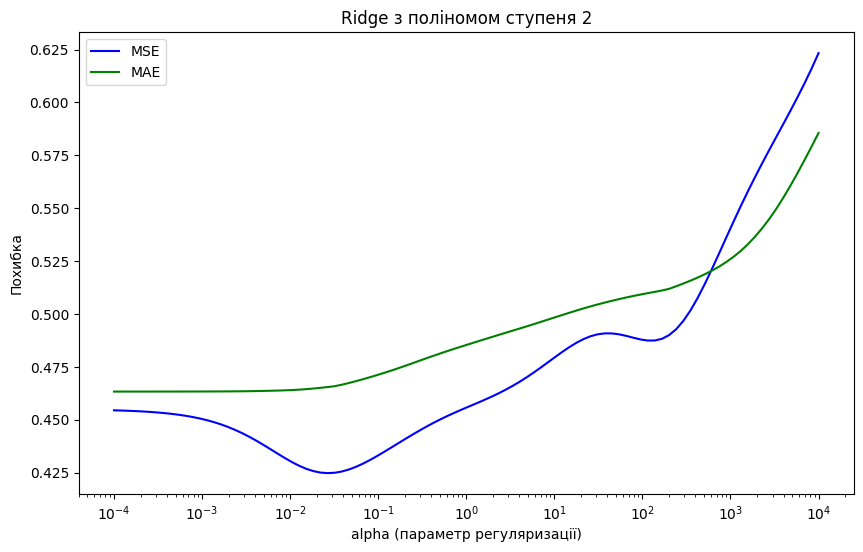

Ridge з поліномом ступеня 6:
  Найкращий alpha для MSE: 351.11917342151344
  Найкращий alpha для MAE: 0.3593813663804629
  Коефіцієнти для MSE: [ 0.         -0.00038282 -0.01067336 ... -0.02151691 -0.01211223
  0.10850409]
  Коефіцієнти для MAE: [ 0.         -0.65464618 -0.69392585 ... -0.93589061  0.26988733
  1.1360515 ]



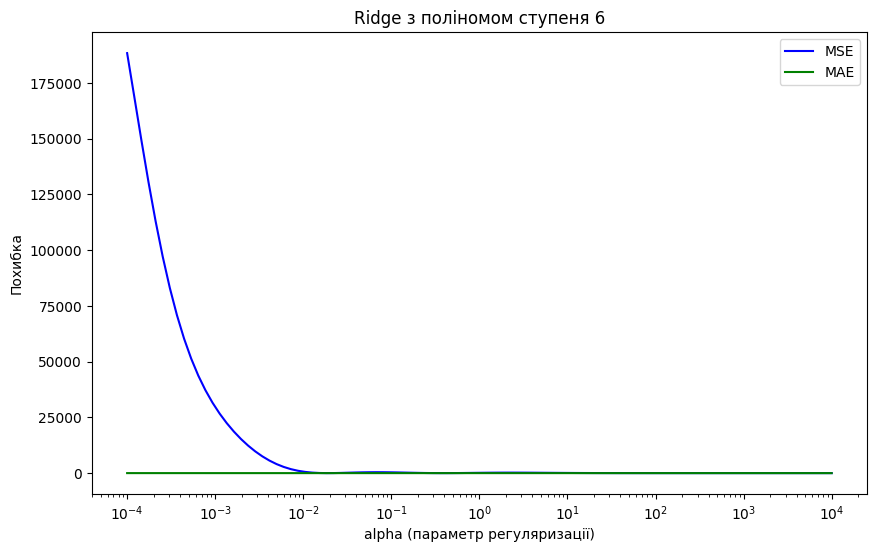

C:\Users\kyryl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.672e+02, tolerance: 1.936e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\kyryl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.504e+02, tolerance: 1.936e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\kyryl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\loca

Lasso з поліномом ступеня 2:
  Найкращий alpha для MSE: 0.0001
  Найкращий alpha для MAE: 0.0001
  Коефіцієнти для MSE: [  0.          -7.09519772  -3.53143711  -0.           0.80892822
  -0.83030793  -0.           0.0685563   -1.18971018  -0.63962445
   0.29756899   0.73715668  -0.40544705   0.30455633  -0.62202749
  -4.43792158 -12.55980363   0.21229535  -0.35976605   0.39378592
   0.07352227  -0.95893148  -1.84576305  -5.09240163   0.64803715
  -0.63198149  -0.41796762   1.01586187   1.32196547   1.75222258
  -0.           0.66147043  -0.321945    -0.51479558  -0.
   0.03563848   1.51384904   0.17708532   0.           1.05815451
   7.63344947   9.22106468   2.25881905   3.45700334  -0.        ]
  Коефіцієнти для MAE: [  0.          -7.09519772  -3.53143711  -0.           0.80892822
  -0.83030793  -0.           0.0685563   -1.18971018  -0.63962445
   0.29756899   0.73715668  -0.40544705   0.30455633  -0.62202749
  -4.43792158 -12.55980363   0.21229535  -0.35976605   0.39378592
   0.0

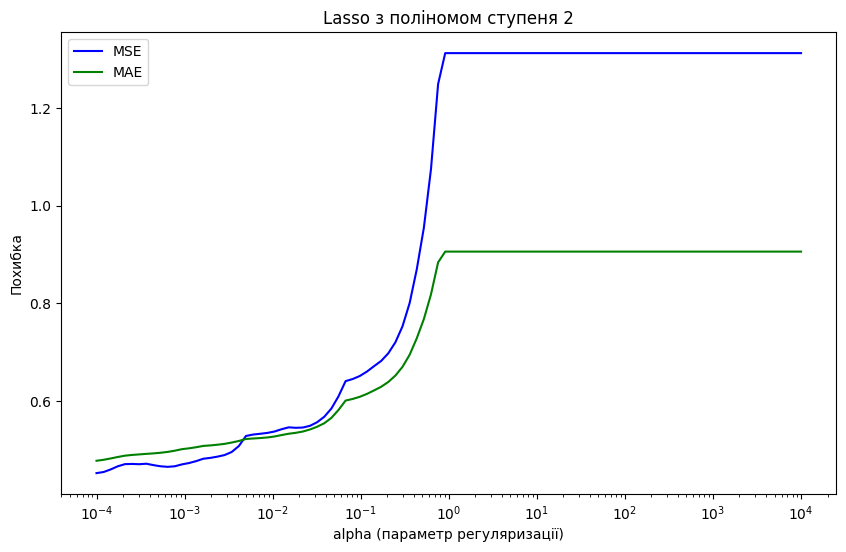

C:\Users\kyryl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.171e+02, tolerance: 1.936e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\kyryl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.905e+01, tolerance: 1.936e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\kyryl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\loca

In [ ]:
"""Kyrylo Boiko Lab 3"""

alpha_range = np.logspace(-4, 4, 100)
degrees = [2,6]
models = [(Ridge, 'Ridge'), (Lasso, 'Lasso')]


results = {}
for model, model_name in models:
    for degree in degrees:
        optimal_alpha_mse, coef_mse, optimal_alpha_mae, coef_mae, mse_list, mae_list = train_and_evaluate_model(
            model, degree, X_train, X_test, y_train, y_test, alpha_range)
        
        results[f'{model_name}_degree_{degree}'] = {
            'optimal_alpha_mse': optimal_alpha_mse,
            'coef_mse': coef_mse,
            'optimal_alpha_mae': optimal_alpha_mae,
            'coef_mae': coef_mae,
            'mse_list': mse_list,
            'mae_list': mae_list
        }


        plt.figure(figsize=(10, 6))
        plt.plot(alpha_range, mse_list, label="MSE", color='b')
        plt.plot(alpha_range, mae_list, label="MAE", color='g')
        plt.xscale('log')
        plt.xlabel('alpha (параметр регуляризації)')
        plt.ylabel('Похибка')
        plt.title(f'{model_name} з поліномом ступеня {degree}')
        plt.legend()
        plt.show()
